<a href="https://colab.research.google.com/github/TAM-DS/TAM-DS/blob/main/KMeans_Cluster_Analyis__1345.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breakdown of the Data isolating into Bins by Age, Gender, Income (Create a def for bin creation)



In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age Bin', 'Annual Income (k$) Bin',
       'Spending Score (1-100) Bin', 'Cluster Name'],
      dtype='object')

In [ ]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster Name
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.425000
std,57.879185,13.969007,26.264721,25.823522,0.792157
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,2.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000
max,200.000000,70.000000,137.000000,99.000000,2.000000


In [ ]:
data["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


In [ ]:
data["Gender"].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


In [ ]:
p1, p2 = np.percentile(data['Age'], [33.3, 66.6])
p1

31.0

In [ ]:
data['Age Bin']=np.where(data['Age']>p2, 'High', np.where(data['Age']>p1, 'Medium', 'Low'))
data["Age Bin"].value_counts()

,count
Age Bin,
Low,70
High,66
Medium,64


In [ ]:
#Create a function to bin the data
def Binner(var,data):
    p1, p2 = np.percentile(data[var], [33.3, 66.6])
    data[var+' Bin']=np.where(data[var]>p2, 'High', np.where(data[var]>p1, 'Medium', 'Low'))
    return data

In [ ]:
Binner('Annual Income (k$)', data)
Binner('Spending Score (1-100)', data)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Bin,Annual Income (k$) Bin,Spending Score (1-100) Bin,Cluster Name
0,1,Male,19,15,39,Low,Low,Low,2
1,2,Male,21,15,81,Low,Low,High,2
2,3,Female,20,16,6,Low,Low,Low,2
3,4,Female,23,16,77,Low,Low,High,2
4,5,Female,31,17,40,Low,Low,Low,2
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,Medium,High,High,1
196,197,Female,45,126,28,Medium,High,Low,0
197,198,Male,32,126,74,Medium,High,High,1
198,199,Male,32,137,18,Medium,High,Low,0


In [ ]:
data.groupby(['Gender', 'Age Bin',
              'Annual Income (k$) Bin',
              'Spending Score (1-100) Bin']).mean()[["Age",
                                                    "Annual Income (k$)",
                                                    "Spending Score (1-100)" ]]









Age  \
Gender Age Bin Annual Income (k$) Bin Spending Score (1-100) Bin              
Female High    High                   Low                         52.166667   
               Low                    Low                         53.500000   
                                      Medium                      55.571429   
               Medium                 Medium                      54.000000   
       Low     High                   High                        29.375000   
                                      Low                         28.000000   
               Low                    High                        24.333333   
                                      Low                         25.500000   
                                      Medium                      29.000000   
               Medium                 High                        31.000000   
                                      Low                         23.666667   
                                      Medium                      21.250000   
       Medium  High                   High                        34.454545   
                                      Low                         39.555556   
               Low                    High                        35.000000   
                                      Low                         38.833333   
                                      Medium                      37.500000   
               Medium                 High                        34.000000   
                                      Low                         39.000000   
                                      Medium                      38.750000   
Male   High    High                   Low                         52.200000   
               Low                    High                        59.000000   
                                      Low                         55.857143   
                                      Medium                      63.750000   
               Medium                 Low                         57.666667   
                                      Medium                      58.250000   
       Low     High                   High                        28.500000   
                                      Low                         20.750000   
               Low                    High                        23.750000   
                                      Low                         19.000000   
                                      Medium                      18.666667   
               Medium                 Low                         18.000000   
                                      Medium                      23.666667   
       Medium  High                   High                        34.000000   
                                      Low                         37.125000   
               Low                    High                        34.000000   
                                      Low                         36.000000   
               Medium                 High                        39.000000   
                                      Low                         43.000000   
                                      Medium                      39.000000   

                                                                  Annual Income (k$)  \
Gender Age Bin Annual Income (k$) Bin Spending Score (1-100) Bin                       
Female High    High                   Low                                  90.166667   
               Low                    Low                                  30.500000   
                                      Medium                               44.428571   
               Medium                 Medium                               58.666667   
       Low     High                   High                                 81.625000   
                                      Low                                  76.000000   
               Low                    High       

In [ ]:
data.groupby(['Gender', 'Age Bin',
              'Annual Income (k$) Bin',
              'Spending Score (1-100) Bin']).count()[["CustomerID"]]

CustomerID
Gender Age Bin Annual Income (k$) Bin Spending Score (1-100) Bin            
Female High    High                   Low                                  6
               Low                    Low                                  6
                                      Medium                               7
               Medium                 Medium                              15
       Low     High                   High                                 8
                                      Low                                  1
               Low                    High                                12
                                      Low                                  2
                                      Medium                               5
               Medium                 High                                 2
                                      Low                                  3
                                      Medium                               8
       Medium  High                   High                                11
                                      Low                                  9
               Low                    High                                 2
                                      Low                                  6
                                      Medium                               2
               Medium                 High                                 1
                                      Low                                  2
                                      Medium                               4
Male   High    High                   Low                                  5
               Low                    High                                 1
                                      Low                                  7
                                      Medium                               4
               Medium                 Low                                  3
                                      Medium                              12
       Low     High                   High                                 6
                                      Low                                  4
               Low                    High                                 8
                                      Low                                  1
                                      Medium                               3
               Medium                 Low                                  1
                                      Medium                               6
       Medium  High                   High                                 8
                                      Low                                  8
               Low                    High                                 2
                                      Low                                  2
               Medium                 High                                 4
                                      Low                                  1
                                      Medium                               2

In [ ]:
data.groupby(['Gender', 'Age Bin',
              'Annual Income (k$) Bin',
              'Spending Score (1-100) Bin']).count()[["CustomerID"]].sort_values(by="CustomerID", ascending=False)

CustomerID
Gender Age Bin Annual Income (k$) Bin Spending Score (1-100) Bin            
Female High    Medium                 Medium                              15
       Low     Low                    High                                12
Male   High    Medium                 Medium                              12
Female Medium  High                   High                                11
                                      Low                                  9
       Low     High                   High                                 8
Male   Medium  High                   Low                                  8
                                      High                                 8
       Low     Low                    High                                 8
Female Low     Medium                 Medium                               8
Male   High    Low                    Low                                  7
Female High    Low                    Medium                               7
       Medium  Low                    Low                                  6
       High    High                   Low                                  6
Male   Low     High                   High                                 6
Female High    Low                    Low                                  6
Male   Low     Medium                 Medium                               6
       High    High                   Low                                  5
Female Low     Low                    Medium                               5
Male   Medium  Medium                 High                                 4
       High    Low                    Medium                               4
       Low     High                   Low                                  4
Female Medium  Medium                 Medium                               4
Male   Low     Low                    Medium                               3
       High    Medium                 Low                                  3
Female Low     Medium                 Low                                  3
       Medium  Medium                 Low                                  2
Male   Medium  Low                    Low                                  2
                                      High                                 2
Female Low     Low                    Low                                  2
Male   Medium  Medium                 Medium                               2
Female Low     Medium                 High                                 2
       Medium  Low                    High                                 2
                                      Medium                               2
Male   Low     Medium                 Low                                  1
Female Low     High                   Low                                  1
Male   High    Low                    High                                 1
Female Medium  Medium                 High                                 1
Male   Medium  Medium                 Low                                  1
       Low     Low                    Low                                  1

Section 2 - Using Unsupervised Machine Learning- Clustering Analysis-K-Means  
This will allow to group similar data points together based on similarities and diffrences - our aim is to partition our dataset into K-Clusters, with each cluster representing a disticnt group of data points.
Reason for using: Scalable | Easy to interpret | many uses: customer segmentation, fraud, and image recognition.

In [ ]:
num_clusters=3
X=data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
#initialize the kmeans algorithm
kmeans=KMeans(n_clusters=num_clusters, random_state=0)
#fit the data to the algorithm
kmeans.fit(X)
#get the cluster labels for each data point
Labels=kmeans.predict(X)
#get the centroids for each cluster
centroids=kmeans.cluster_centers_

In [ ]:
centroids

array([[40.39473684, 87.        , 18.63157895],
       [32.69230769, 86.53846154, 82.12820513],
       [40.32520325, 44.15447154, 49.82926829]])

In [ ]:
cluster_labels=kmeans.predict(X)
data['Cluster Name']=cluster_labels
data.sample(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Bin,Annual Income (k$) Bin,Spending Score (1-100) Bin,Cluster Name
109,110,Male,66,63,48,High,Medium,Medium,2
18,19,Male,52,23,29,High,Low,Low,2
193,194,Female,38,113,91,Medium,High,High,1
197,198,Male,32,126,74,Medium,High,High,1
59,60,Male,53,46,46,High,Low,Medium,2
87,88,Female,22,57,55,Low,Medium,Medium,2
78,79,Female,23,54,52,Low,Medium,Medium,2
135,136,Female,29,73,88,Low,High,High,1
139,140,Female,35,74,72,Medium,High,High,1
127,128,Male,40,71,95,Medium,Medium,High,1


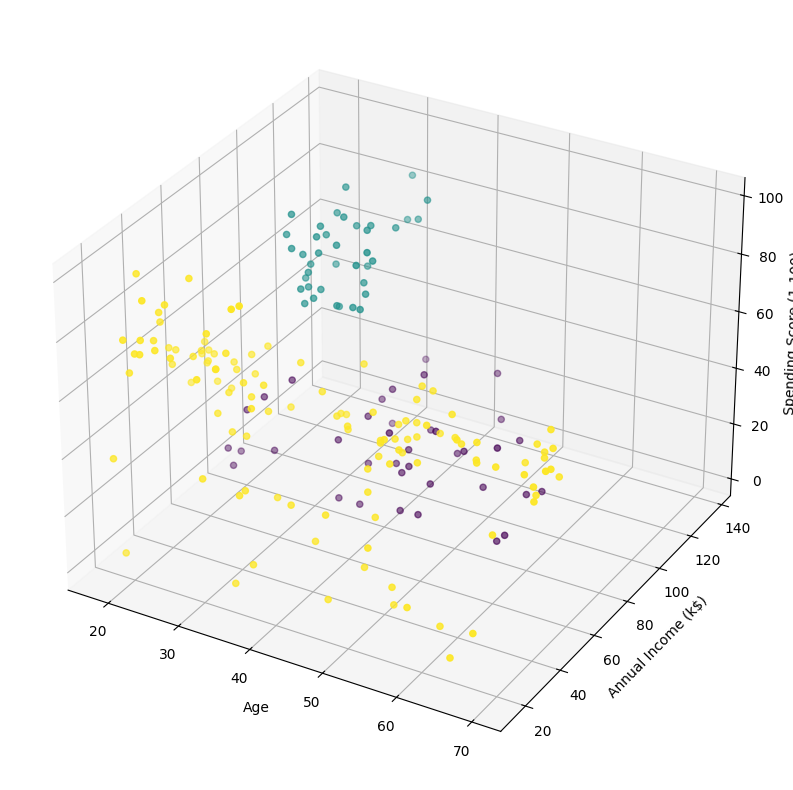

In [ ]:
#Plot clusters in 3D per client
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

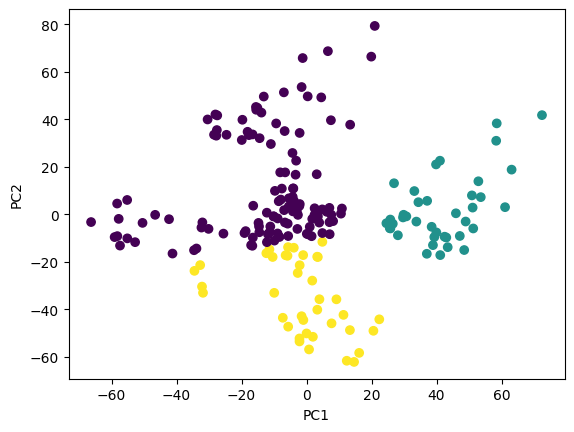

In [ ]:
#Per client For Management Engagement apply PCA to reduce dimensionality
 #to 2 componenets

#fit the data to the algorithm
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

#apply kmeans clustering
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)


#plot the cluster in 2D
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [ ]:
#Deriving insights from the Unsupervised Cluster Features
#Question 1 Compute the mean of all the attributes grouped by the clusters
#Question 2 Compute the median of all the attributes grouped by the clusters
#Question 3 Identify all the diffrences in the attribute mean and median
#Question 4 Devise strategies based on the clusters

In [ ]:
data.groupby('Cluster Name') [["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster Name,,,
0,40.394737,87.000000,18.631579
1,32.692308,86.538462,82.128205
2,40.325203,44.154472,49.829268


In [ ]:
data.groupby('Cluster Name') [["Age", "Annual Income (k$)", "Spending Score (1-100)"]].median()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster Name,,,
0,41.5,80.0,16.5
1,32.0,79.0,83.0
2,38.0,46.0,50.0


In [ ]:
pd.crosstab(data['Cluster Name'], data['Gender'], normalize='index')

Gender,Female,Male
Cluster Name,,
0,0.473684,0.526316
1,0.538462,0.461538
2,0.593496,0.406504


What are the insights?

In [ ]:
#Cluster 0 - "Savvy Savers" Middle Aged, High Income, Low Spending:
#Targeted Savings Offers: Exclusive savings or investment opportunities
#Loyalty Programs: Introduce prgrams to motivate higher spending
#Exclusive Events: Host events appealing to mature audience
#Gender Neutral Approach: Keep marketing efforst blalanced for both genders


In [ ]:
#Cluster 1 - Trendsetters" Younger, High income, High Spending
#Trendy Product Launches: Promote the lastest products
#Experiential Marketing: Focus on Pop Ups
#Subscription Services: Offer subscriptions on trendy experiences and or items
#Female Focused: Slight emphesis on female centric - Fashion, Beauty, Lifestyle

In [ ]:
#Cluster 2 - "Value Seekers" Middle Aged, Average Income, Average Spending
#Value Deals: Bundled value offers
#Educational Workshops: Host classes on personal finance and home inprovement
#Personalized Marketing: Tailor marketing efforts to individual preferences
#Female Centric Campaigns: Focus on products and capaigns on health and wellness

In [ ]:
#Should we redetermin the number of clusters? - Yes


In [ ]:
#Elbow Method: plotting the sum squared distances between each data point
#and its aligned centroid (WCSS) against the number of clusters. The optimal
#number of clusters is the point of inflection of elbow in the curve.

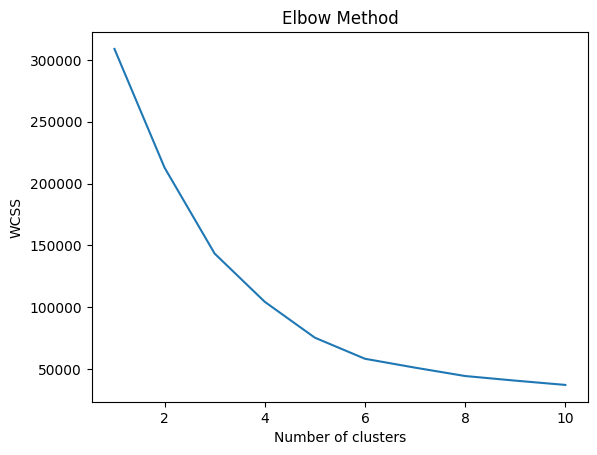

In [ ]:
# Run k-means clustering for k=1 to 10 clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=300, n_init=10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#One could argue that the first curve happens around 3, but possible 5
#could be in play.

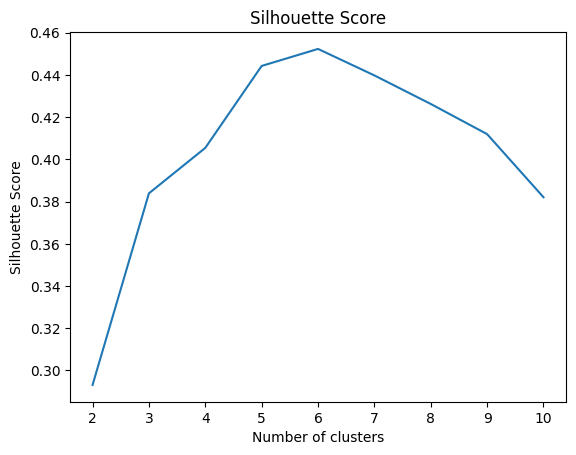

In [ ]:
#Alternative is to use the Silhouette Score

from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=300, n_init=10,
                    random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Silhouette Score
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
#The results using 3 clusters were accepted, although both the eblow and the
#silhouette suggest that 5 clusters may offer diffrent findings.